SAR-Colombia<br>
Example scripts for Standardized Precipitation Index and Keetch-Byram Drought Index


In [12]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from standard_precip.spi import SPI
from standard_precip.utils import plot_index
import numpy as np
from geopandas.tools import sjoin
import geoplot

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6

In [13]:
import os

path = './Temp'

# Check whether the specified path exists or not
isExist = os.path.exists(path)

if not isExist:
 
    # Create a new directory because it does not exist 
    os.makedirs(path)
    print("Temp directory created!")

In [14]:
datafile = "./Data/PTPM_CON@32010010.data"
dat = pd.read_csv(datafile,sep="|")
dat['Fecha'] = pd.to_datetime(dat['Fecha'])
dat.set_index(dat['Fecha'],inplace=True,drop=True)
dat.index.name = None
dat = dat[dat['Fecha'] >= '1990-01-01']

In [15]:
dat.head()

,Fecha,Valor
1991-06-03 07:00:00,1991-06-03 07:00:00,0.0
1991-06-04 07:00:00,1991-06-04 07:00:00,5.0
1991-06-05 07:00:00,1991-06-05 07:00:00,2.0
1991-06-06 07:00:00,1991-06-06 07:00:00,0.0
1991-06-07 07:00:00,1991-06-07 07:00:00,7.0


<AxesSubplot:xlabel='Fecha'>

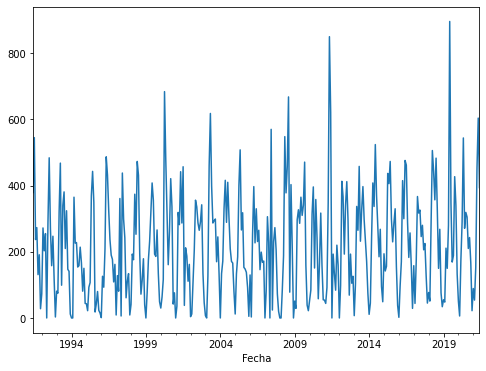

In [16]:
# Example of grouping data using 'resample'
dat.resample(rule='M', on='Fecha')['Valor'].sum().plot()

<AxesSubplot:xlabel='Fecha'>

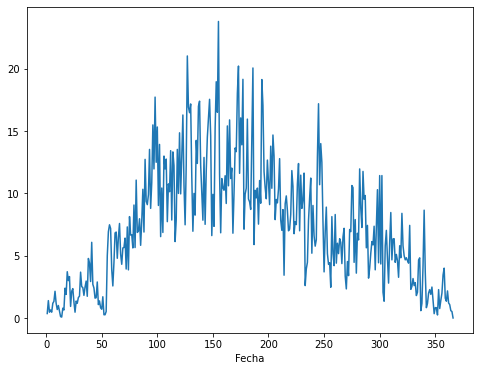

In [17]:
# Example of grouping data using 'groupby'
dat.Valor.groupby(dat.Fecha.dt.dayofyear).mean().plot()

In [18]:
# You can use 'dt' functions to create time variables for summaries
# This is an example for the Day of the Year, or Yearday
dat.Fecha.dt.dayofyear

1991-06-03 07:00:00    154
1991-06-04 07:00:00    155
1991-06-05 07:00:00    156
1991-06-06 07:00:00    157
1991-06-07 07:00:00    158
                      ... 
2021-06-26 07:00:00    177
2021-06-27 07:00:00    178
2021-06-28 07:00:00    179
2021-06-29 07:00:00    180
2021-06-30 07:00:00    181
Name: Fecha, Length: 10630, dtype: int64

In [19]:
# Determine the historical 50th and 75th percentile of daily rainfall events
dat.Valor.quantile([.5,.75])

0.50    0.0
0.75    9.0
Name: Valor, dtype: float64

In [20]:
spi = SPI()
numdays = 90   #Note: this number will be used to create a new variable in the 'dat' DataFrame
                # For example: Valor_scale_90_calculated_index
df_spi = spi.calculate(
    dat, 
    'Fecha', 
    'Valor', 
    freq="D", 
    scale=numdays, 
    fit_type="lmom", 
    dist_type="gam"
)

In [ ]:
fig = plot_index(df_spi, 'Fecha', f'Valor_scale_{numdays}_calculated_index')
fig.gca().set_title('La Mariposa, Municipio de La Uribe')
fout = f"./Temp/LaMariposa_{numdays}Day_SPI.png"
if(fout != ""):
    plt.savefig(fout, dpi=300, bbox_inches='tight')

In [ ]:
df_spi.Valor_scale_90_calculated_index.groupby(df_spi.Fecha.dt.dayofyear).mean()[0:364].plot()
plt.grid()
fout = f"./Temp/LaMariposa_{numdays}MeanDaily_SPI.png"
if(fout != ""):
    plt.savefig(fout, dpi=300, bbox_inches='tight')

In [ ]:
# Read the MODIS data archive from FIRMS for COlombia
base = r'./Data/FIRMS'
#base = r'D:\Data\Peru\FIRMS_Hist'
modiscofn = "%s/%s" % (base,"fire_archive_M-C61_221838.shp")
modisco = gpd.read_file(modiscofn)

In [ ]:
modisco.plot()

In [ ]:
base = "./Data/Base/ne_10m_admin_1_states_provinces"
fname = f"{base}/ne_10m_admin_1_states_provinces.shp"
Admin1Bnd = gpd.read_file(fname)
CO_Bnds = Admin1Bnd[Admin1Bnd.iso_a2.isin(["CO"])]
Meta_Bnd = Admin1Bnd[Admin1Bnd.name.isin(["Meta"])]

In [ ]:
Meta_Bnd.plot()

In [ ]:
points_polys = gpd.sjoin(modisco, CO_Bnds, how="left")
points_polys['ACQ_DATE'] = pd.to_datetime(points_polys.ACQ_DATE)
points_polys.head(10)

In [ ]:
MODIS_Meta = points_polys[points_polys['name'] == "Meta"]
MODIS_Bogota = points_polys[points_polys['name'] == "Bogota"]


In [ ]:
MODIS_Bogota.groupby(MODIS_Bogota.ACQ_DATE.dt.month).FRP.sum().plot()

In [ ]:
ax = geoplot.kdeplot(
    MODIS_Meta.head(1000), clip=Meta_Bnd,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(Meta_Bnd, ax=ax, zorder=1)

In [ ]:
MODIS_Meta['FRP_Norm'] = (MODIS_Meta['FRP'] - MODIS_Meta['FRP'].min()) / (MODIS_Meta['FRP'].max() - MODIS_Meta['FRP'].min())
MODIS_Meta.groupby(MODIS_Meta.ACQ_DATE.dt.dayofyear).FRP_Norm.max().plot()

In [ ]:
df_spi.Valor_scale_90_calculated_index.groupby(df_spi.Fecha.dt.dayofyear).mean()[0:364].plot()
plt.grid()
fout = f"D:/Temp/LaMariposa_{numdays}MeanDaily_SPI.png"
if(fout != ""):
    plt.savefig(fout, dpi=300, bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

fig, ax = plt.subplots()
fig.subplots_adjust(right=0.7)
plt.gca().grid()
df_spi.Valor_scale_90_calculated_index.groupby(df_spi.Fecha.dt.dayofyear).sum()[0:364].plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
MODIS_Meta.groupby(MODIS_Meta.ACQ_DATE.dt.dayofyear).FRP.sum().plot(ax=ax, style='r-', secondary_y=True)
#df.C.plot(ax=ax3, style='g-')

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0]],\
           ['SPI','Sum of FRP (Normalized)'], bbox_to_anchor=(1.7, 0.5))
fout = f"./Temp/LaMariposa_{numdays}Mean_SPIandFRPSum_Compare.png"
if(fout != ""):
    plt.savefig(fout, dpi=300, bbox_inches='tight')

In [ ]:
# New data file with precipitation and temperature
datafile = "./Data/estacion1_35035020.csv"
dat = pd.read_csv(datafile) #,sep="|")
dat['Fecha'] = pd.to_datetime(dat['Fecha'])
dat.set_index(dat['Fecha'],inplace=True,drop=True)
dat.index.name = None
dat = dat[dat['Fecha'] >= '1990-01-01']


In [ ]:
dat['Precipitacion'].plot()

In [ ]:
ax = dat.Temperatura.groupby(dat.Fecha.dt.dayofyear).max().plot()
dat.Temperatura.groupby(dat.Fecha.dt.dayofyear).median().plot(ax=ax)
dat.Temperatura.groupby(dat.Fecha.dt.dayofyear).min().plot(ax=ax)
plt.grid()

In [ ]:
dat.Precipitacion.groupby(dat.Fecha.dt.year).sum().plot()

In [ ]:
# Keetch-Byram Drought Index Calculator
# Author: W. Matt Jolly, USFS, RMRS, Missoula Fire Sciences Laboratory
#         Email: william.jolly@usda.gov
# Reference: Keetch, J. J., and G. M. Byram, 1968: A drought index for 
#             forest fire control.USDA Forest Service Research Paper, SE-38, 1-32.
import math
class KBDI:
    yKBDI = 100  # Yesterday's KBDI value
    KBDI = 100   # Final KBDI value
    fAvgPrecip = 15  # Mean annual precipitation (inches)
    CummPrecip = 0   # Cumulative precipitation (inches)
   
    def __init__(self,fAvgPrecipIn):
        self.fAvgPrecip = fAvgPrecipIn
       
    def Calc (self,fPrecipAmt, iMaxTemp):
            net = 0
            idq = 0
            pptnet = 0.00
            xkbdi = 0.00
            xtemp = 0.00

            KBDI = int(self.yKBDI)
            if(fPrecipAmt == 0.0):
                self.CummPrecip = 0
            else:
                if(self.CummPrecip > 0.20):
                    pptnet = fPrecipAmt
                    self.CummPrecip = self.CummPrecip + fPrecipAmt
                else:
                    self.CummPrecip = self.CummPrecip + fPrecipAmt
                    if(self.CummPrecip > 0.20):
                        pptnet = self.CummPrecip - 0.20

            net = (100.0 * pptnet) + 0.0005

            net = KBDI - net

            if net > 0:
                KBDI = round(net,0)
            else:
                KBDI = 0
            if(iMaxTemp > 50):
                idq = (800.0 - KBDI) * (0.9679 * math.exp(0.0486 * iMaxTemp) - 8.299) * 0.001 / (1.0 + 10.88 * math.exp(-0.04409 * self.fAvgPrecip)) + 0.5
            self.KBDI = int(KBDI + idq)
            self.yKBDI = self.KBDI
            return self.KBDI


In [ ]:
# Calculate the mean annual precipitation in inches
mean_annual_precip = dat.Precipitacion.groupby(dat.Fecha.dt.year).sum().mean() / 25.4

In [ ]:
mean_annual_precip

In [ ]:
dat['KBDI'] = 100
kbdi = KBDI(mean_annual_precip)
for index, row in dat.iterrows():
    kbdi_diario = kbdi.Calc(row['Precipitacion'] / 25.4,(row['Temperatura'] * 9/5) + 32)
    dat.at[index,'KBDI'] = kbdi_diario

In [ ]:
dat.KBDI.plot()

In [ ]:
statid = "35035020 (Villavicencio, Meta, Colombia)"
ax = dat.KBDI.groupby(dat.Fecha.dt.dayofyear).median().plot(title=statid,legend=True,label="Median")
dat.KBDI.groupby(dat.Fecha.dt.dayofyear).max().plot(ax=ax,legend=True,label="Max")
dat.KBDI.groupby(dat.Fecha.dt.dayofyear).min().plot(ax=ax,legend=True,label="Min")
plt.gca().set_ylabel("Keetch-Byram Drought Index")
MODIS_Meta.groupby(MODIS_Meta.ACQ_DATE.dt.dayofyear).FRP_Norm.max().plot(ax=ax,secondary_y=True,legend=True,label='MODIS FRP Norm')
plt.gca().set_ylabel("MODIS FRP_Norm")

plt.grid()
fout = f"D:/Temp/{statid}_MeanDailyKBDI.png"
if(fout != ""):
    plt.savefig(fout, dpi=300, bbox_inches='tight')

In [ ]:
statid = "35035020 (Villavicencio, Meta, Colombia)"
ax = dat.Temperatura.groupby(dat.Fecha.dt.dayofyear).median().plot(title=statid,legend=True,label="Median")
dat.Temperatura.groupby(dat.Fecha.dt.dayofyear).max().plot(ax=ax,legend=True,label="Max")
dat.Temperatura.groupby(dat.Fecha.dt.dayofyear).min().plot(ax=ax,legend=True,label="Min")
plt.gca().set_ylabel("Temperatura (deg C)")
#MODIS_Meta.groupby(MODIS_Meta.ACQ_DATE.dt.dayofyear).FRP_Norm.max().plot(ax=ax,secondary_y=True,legend=True,label='MODIS FRP Norm')
#plt.gca().set_ylabel("MODIS FRP_Norm")

plt.grid()
fout = f"D:/Temp/{statid}_MeanDailyTemp.png"
if(fout != ""):
    plt.savefig(fout, dpi=300, bbox_inches='tight')

In [ ]:
statid = "35035020 (Villavicencio, Meta, Colombia)"
ax = dat.Precipitacion.groupby(dat.Fecha.dt.dayofyear).median().plot(title=statid,legend=True,label="Median")
dat.Precipitacion.groupby(dat.Fecha.dt.dayofyear).quantile(0.75).plot(ax=ax,legend=True,label="75th Percentile")
dat.Precipitacion.groupby(dat.Fecha.dt.dayofyear).min().plot(ax=ax,legend=True,label="Min")
plt.gca().set_ylabel("Precipitacion (mm)")
#MODIS_Meta.groupby(MODIS_Meta.ACQ_DATE.dt.dayofyear).FRP_Norm.max().plot(ax=ax,secondary_y=True,legend=True,label='MODIS FRP Norm')
#plt.gca().set_ylabel("MODIS FRP_Norm")

plt.grid()
fout = f"D:/Temp/{statid}_MeanDailyPrecip.png"
if(fout != ""):
    plt.savefig(fout, dpi=300, bbox_inches='tight')

In [ ]:
spi = SPI()
numdays = 180
df_spi = spi.calculate(
    dat, 
    'Fecha', 
    'Precipitacion', 
    freq="D", 
    scale=numdays, 
    fit_type="lmom", 
    dist_type="gam"
)

In [ ]:
fig = plot_index(df_spi, 'Fecha', f'Precipitacion_scale_{numdays}_calculated_index')
fig.gca().set_title(statid)
#axs[0].set_xlabel('distance (m)')
#axs[0].set_ylabel('Damped oscillation')
#fig.suptitle('This is a somewhat long figure title', fontsize=16)
fout = f"./Temp/{statid}_{numdays}Day_SPI.png"
if(fout != ""):
    plt.savefig(fout, dpi=300, bbox_inches='tight')

In [ ]:
# Plot a histogram
dat.Precipitacion[dat.Precipitacion > 0].plot.hist()
plt.gca().set_xlabel("Precipitacion",fontsize=16)
plt.gca().set_ylabel("Frequencia",fontsize=16)
plt.grid()

In [ ]:
import xarray as xr
import rioxarray as rio
import os.path
from os import path
from datetime import date, datetime,timedelta
from dateutil.relativedelta import relativedelta


In [ ]:


start_date = date(2020, 1, 1)
end_date = date(2020, 12, 31)

#delta = timedelta(months=+1)
delta = relativedelta(months=1)
ds = xr.Dataset()
i = 0
while start_date <= end_date:
    strdate = int(start_date.strftime("%m"))
    file_name = 'D:/Data/Climate/wc2.1_2.5m_prec/wc2.1_2.5m_prec_%02d.tif' % (strdate)
    dt64 = np.datetime64(start_date)
    print(file_name)
    
    print(start_date)
    wc_precip = xr.open_rasterio(file_name)
    wc_precip =  wc_precip.rename({"y":"latitude","x":"longitude"})
    #wc_precip = wc_precip.assign_coords(longitude=(((senamhi_fwi0.longitude + 180) % 360) - 180)).sortby('longitude')
    dat = xr.Dataset({"time": dt64,"tp":wc_precip})
    dat = dat.drop('band')
    dat = dat.assign_coords({"time": dat.time})
    dat = dat.rio.clip(CO_Bnds.geometry, CO_Bnds.crs, invert=True,drop=True)
    if i == 0:
        ds = dat
    else:
        ds = xr.concat([ds,dat],dim='time')
    i += 1
    start_date = start_date + delta
#for i in range(1,13):
#    Month = i
#    myFile = 'D:/Data/Climate/wc2.1_2.5m_prec/wc2.1_2.5m_prec_%02d.tif' % (Month)
#    print(myFile)
#    xds = xr.open_rasterio(myFile)
#    
#    clipped = clipped.to_dataset(name="Precip")

In [ ]:
mydate = date(2020,1,1)
dt = relativedelta(months=1)
print(mydate + dt)
mydate = mydate + dt
print(mydate)

In [ ]:
ds.tp.where()